In [1]:
#import文
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from deepface import DeepFace
import mysql.connector

#When cv2 does not work
#from PIL import Image
#import numpy as np

## Operate MySQL from python
-analyze image by deepface
-insert the analysis result into database

In [10]:
#Read image data by cv2
img=cv2.imread('Emma_Watson.jpg')

#When cv2 does not work
#img=np.asarray(Image.open('{file_path}'))[:,:,:3]

In [3]:
#deepface
result=DeepFace.analyze(img,actions=['age','gender','race','emotion'])

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.59it/s]


In [4]:
#show results
print(result)

[{'age': 28, 'region': {'x': 143, 'y': 109, 'w': 205, 'h': 205}, 'gender': {'Woman': 99.96032118797302, 'Man': 0.039686169475317}, 'dominant_gender': 'Woman', 'race': {'asian': 5.166247376748291e-13, 'indian': 9.084323021651811e-13, 'black': 5.299090442854321e-17, 'white': 99.99995827674617, 'middle eastern': 1.3195191504346504e-05, 'latino hispanic': 2.9412941037304794e-05}, 'dominant_race': 'white', 'emotion': {'angry': 2.1565264194141404e-07, 'disgust': 2.0108641716933157e-13, 'fear': 8.190962285935455e-09, 'happy': 96.01529216857506, 'sad': 0.001003539060337003, 'surprise': 8.671663726596447e-06, 'neutral': 3.983702748042509}, 'dominant_emotion': 'happy'}]


In [5]:
#make variable to get analysis result from 
age=result[0]['age']
Man=round(result[0]['gender']['Man'],4)
asian=round(result[0]['race']['asian'],4)
indian=round(result[0]['race']['indian'],4)
black=round(result[0]['race']['black'],4)
white=round(result[0]['race']['white'],4)
middle_eastern=round(result[0]['race']['middle eastern'],4)
latino_hispanic=round(result[0]['race']['latino hispanic'],4)
race=result[0]['dominant_race']
angry=round(result[0]['emotion']['angry'],4)
disgust=round(result[0]['emotion']['disgust'],4)
fear=round(result[0]['emotion']['fear'],4)
happy=round(result[0]['emotion']['happy'],4)
sad=round(result[0]['emotion']['sad'],4)
surprise=round(result[0]['emotion']['surprise'],4)
neutral=round(result[0]['emotion']['neutral'],4)
dominant_emotion=result[0]['dominant_emotion']

In [6]:
#convert the above variable into a tapple
vals=(age,Man,asian,indian,black,white,middle_eastern,latino_hispanic,race,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion)

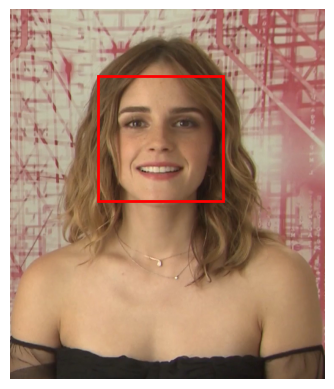

In [12]:
#show the detected face area
fig=plt.figure()
ax=plt.axes()

#opencv read the image at the order of BGRA, while the plt.imshow expects RGB.
#change the order
img2=img[:,:,[2,1,0]]

#plot image
plt.imshow(img2)

#plot rectangle on the cordinates shown in result 
r=patches.Rectangle(xy=(result[0]['region']['x'],result[0]['region']['y']),width=result[0]['region']['w'],height=result[0]['region']['h'],fill=False,linewidth=2,color='red')
ax.add_patch(r)
plt.axis('scaled')
ax.set_aspect('equal')

#axis is off
ax.axis("off")
plt.show()

In [6]:
#connect to mysql
connection = mysql.connector.connect(host='localhost',user='root',password='{password}',database='{database name}')

#with connection:
with connection.cursor() as cursor:
    #insert vals into table Face1
    sql = "insert into Face1 (age,Man,asian,indian,black,white,middle_eastern,latino_hispanic,race,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion) values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
    cursor.execute(sql,vals)

#Commit
connection.commit()

#close connection to mysql
cursor.close()

False